In [2]:
import os, json
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
os.chdir("output/fhirALL")
fL = os.listdir()

In [7]:
totObsList = []
cndtnCounter = {}

for f in fL:
    #print (f)
    patFile = open(f)
    try:
        patJSON = json.load(patFile)
    except:
        continue
    patEntry = patJSON['entry']
    try:
        name = patEntry[0]['resource']['name'][0]['given'][0] + " " + patEntry[0]['resource']['name'][0]['family']
    except:
        continue
    cndtns = [ ent['resource']['code']['coding'][0]['display'] for ent in patEntry if ent["resource"]["resourceType"]  == "Condition"]
    cndtnSeenList = []
    for cnd in cndtns:
        if not cnd in cndtnSeenList:
            try:
                cndtnCounter[cnd] +=1
            except:
                cndtnCounter[cnd] =1
            cndtnSeenList.append(cnd)
    patCO2 = [(name,ent['resource']['valueQuantity']['value'],ent['resource']['effectiveDateTime']) for ent in patEntry if ent['resource']['resourceType'] =="Observation" and ent['resource']['category'][0]['coding'][0]['code']=="laboratory" and ent['resource']['code']['text'] == "Carbon Dioxide"]
    #observations = [cnd['resource']['code']['coding'][0]['display'] for cnd in patObservations]
    totObsList.append(patCO2)
    patFile.close()

In [8]:
avgList = []
for person in totObsList:
    total = 0
    for CO2Obs in person:
        total += CO2Obs[1]
    if not total == 0:
        avg = total/(len(person))
        avgList.append(avg)

In [9]:
npAVL = np.array(avgList)

(array([  4.,  12.,  31.,  70., 148., 106.,  39.,   8.,   8.,   5.]),
 array([21.115 , 21.8395, 22.564 , 23.2885, 24.013 , 24.7375, 25.462 ,
        26.1865, 26.911 , 27.6355, 28.36  ]),
 <a list of 10 Patch objects>)

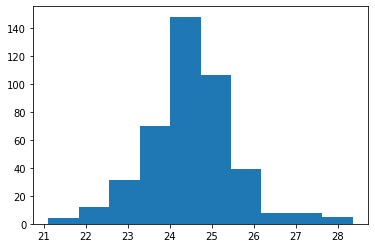

In [10]:
plt.hist(npAVL)

In [11]:
len(totObsList)

1165

In [13]:
len(npAVL)

431

In [23]:
cndtnCounter

{'Otitis media': 142,
 'Hypertension': 304,
 'Miscarriage in first trimester': 206,
 'Tubal pregnancy': 28,
 'Seizure disorder': 52,
 'History of single seizure (situation)': 52,
 'Epilepsy': 28,
 'Malignant neoplasm of breast (disorder)': 27,
 'Body mass index 30+ - obesity (finding)': 359,
 'Normal pregnancy': 191,
 'Fetus with unknown complication': 49,
 'Hyperlipidemia': 118,
 'Atrial Fibrillation': 44,
 'Prediabetes': 332,
 'Anemia (disorder)': 325,
 'Diabetes': 88,
 'Hyperglycemia (disorder)': 42,
 'Hypertriglyceridemia (disorder)': 85,
 'Metabolic syndrome X (disorder)': 84,
 'Chronic kidney disease stage 1 (disorder)': 41,
 'Diabetic renal disease (disorder)': 43,
 'Osteoarthritis of hip': 24,
 'Stroke': 48,
 'Opioid abuse (disorder)': 8,
 'Alcoholism': 7,
 'Neoplasm of prostate': 27,
 'Carcinoma in situ of prostate (disorder)': 23,
 'Acute bronchitis (disorder)': 455,
 'Suspected lung cancer (situation)': 8,
 'Non-small cell lung cancer (disorder)': 8,
 'Non-small cell carcino